In [1]:
# A ce stade, nous avons 47 variables. 
# Objectif de ce notebook : sélectionner les variables qui seront utilisées pour la modélisation.
# Nous allons utiliser ici 3 méthodes : Lasso, SelectKbest, VarianceThreshold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv("df.csv")

In [4]:
df.head()

,Revente >1,libnatmut,valeurfonc,nblot,l_codinsee,nblocdep,Type appart,scarrez,anarnc202012_nb_log,anarnc202012_nb_lot_garpark,...,baie_orientation_autre,Commerces_bruyants,qty_of_mut,datemut,anneemut,moismut,etaban_lot,cat_valeur,surface_appart,cat_scarrez
0,0,Vente,370000.0,1,75101,1,2P,26.06,158.0,0.0,...,0,1,1,2021-06-04,2021,6,75101_4901_00019_93,Entre 320 & 436k€ €,32,<35 m²
1,0,Vente,451000.0,1,75117,0,2P,35.53,32.0,0.0,...,0,0,1,2021-03-18,2021,3,75117_5503_00103_24,Entre 436 & 600k€,30,Entre 35 & 47 m²
2,0,Vente,433000.0,3,75115,1,3P,35.40,50.0,0.0,...,0,0,1,2021-11-12,2021,11,75115_2521_00008_19,Entre 320 & 436k€ €,34,Entre 35 & 47 m²
3,1,Vente,561076.0,1,75118,0,2P,46.02,29.0,0.0,...,0,1,2,2021-01-08,2021,1,75118_2113_00110_19,Entre 436 & 600k€,50,Entre 35 & 47 m²
4,1,Vente,375980.0,1,75118,0,2P,45.76,29.0,0.0,...,0,1,2,2016-09-09,2016,9,75118_2113_00110_19,Entre 320 & 436k€ €,50,Entre 35 & 47 m²


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 41 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Revente >1                                   102577 non-null  int64  
 1   libnatmut                                    102577 non-null  object 
 2   valeurfonc                                   102577 non-null  float64
 3   nblot                                        102577 non-null  object 
 4   l_codinsee                                   102577 non-null  int64  
 5   nblocdep                                     102577 non-null  int64  
 6   Type appart                                  102577 non-null  object 
 7   scarrez                                      102577 non-null  float64
 8   anarnc202012_nb_log                          102577 non-null  float64
 9   anarnc202012_nb_lot_garpark                  102577 non-nul

In [6]:
# Suppression des variables qui vont gêner la modélisation :

to_drop=(["datemut",
         "moismut",
         "etaban_lot",
         "cat_valeur",
         "cat_scarrez"])
df=df.drop(to_drop, axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Revente >1                                   102577 non-null  int64  
 1   libnatmut                                    102577 non-null  object 
 2   valeurfonc                                   102577 non-null  float64
 3   nblot                                        102577 non-null  object 
 4   l_codinsee                                   102577 non-null  int64  
 5   nblocdep                                     102577 non-null  int64  
 6   Type appart                                  102577 non-null  object 
 7   scarrez                                      102577 non-null  float64
 8   anarnc202012_nb_log                          102577 non-null  float64
 9   anarnc202012_nb_lot_garpark                  102577 non-nul

In [8]:
df.isna().sum()

Revente >1                                     0
libnatmut                                      0
valeurfonc                                     0
nblot                                          0
l_codinsee                                     0
nblocdep                                       0
Type appart                                    0
scarrez                                        0
anarnc202012_nb_log                            0
anarnc202012_nb_lot_garpark                    0
anarnc202012_nb_lot_tertiaire                  0
anarnc202012_nb_lot_tot                        0
adedpe202006_logtype_baie_type_vitrage         0
adedpe202006_logtype_ch_gen_lib_princ          0
adedpe202006_logtype_classe_conso_ener         0
adedpe202006_logtype_classe_estim_ges          0
adedpe202006_logtype_traversant                0
adedpe202006_logtype_ecs_type_ener             0
adedpe202006_logtype_ph_pos_isol               0
adedpe202006_logtype_presence_climatisation    0
adedpe202006_logtype

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# On va garder "Qty of mut" comme variable cible. Suppression de "Revente>1"
df=df.drop("Revente >1", axis=1)

In [11]:
#Features / Target

X=df.drop("qty_of_mut", axis=1)
y=df["qty_of_mut"]

X.shape, y.shape

((102577, 34), (102577,))

In [12]:
numeric_columns=X.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['valeurfonc',
 'l_codinsee',
 'nblocdep',
 'scarrez',
 'anarnc202012_nb_log',
 'anarnc202012_nb_lot_garpark',
 'anarnc202012_nb_lot_tertiaire',
 'anarnc202012_nb_lot_tot',
 'adedpe202006_logtype_presence_climatisation',
 'ancqpv201410_is_qpv',
 'cerffo2020_nb_log',
 'igntop202103_bat_hauteur',
 'mcumer202007_is_mer',
 'baie_orientation_sud',
 'baie_orientation_nord',
 'baie_orientation_ouest',
 'baie_orientation_est',
 'baie_orientation_autre',
 'Commerces_bruyants',
 'anneemut',
 'surface_appart']

In [13]:
object_columns=X.select_dtypes(include='object').columns.tolist()
object_columns

['libnatmut',
 'nblot',
 'Type appart',
 'adedpe202006_logtype_baie_type_vitrage',
 'adedpe202006_logtype_ch_gen_lib_princ',
 'adedpe202006_logtype_classe_conso_ener',
 'adedpe202006_logtype_classe_estim_ges',
 'adedpe202006_logtype_traversant',
 'adedpe202006_logtype_ecs_type_ener',
 'adedpe202006_logtype_ph_pos_isol',
 'adedpe202006_logtype_type_batiment',
 'cerffo2020_annee_construction',
 'cerffo2020_usage_niveau_1_txt']

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape

((76932, 34), (25645, 34))

In [15]:
#DICHOTOMISATION

In [16]:
X_train=pd.get_dummies(X_train)

In [17]:
X_test=pd.get_dummies(X_test)

In [18]:
X_train.shape

(76932, 111)

In [19]:
X_test.shape

(25645, 111)

In [20]:
# NORMALISATION

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [21]:
# SELECTION DE VARIABLE PAR LASSO 
# Lasso consiste en l'ajout d'une contrainte sur les coefficients lors de la modélisation pour maîtriser 
# l'amplitude de leurs valeurs.
# Cette contrainte se concrétise par l'ajout d'une fonction de pénalité  à la somme des carrées des résidus 
# que l'on cherche à minimiser.
# L'intérêt principal de la régression Lasso  est qu'elle peut faire office de dispositif de sélection de variables.

from sklearn.linear_model import Lasso

In [22]:
lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train, y_train)

Lasso(alpha=1)

In [23]:
lasso_r.coef_

array([ 0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
        0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.])

In [24]:
lasso_r=Lasso(alpha=0.1)
lasso_r.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
lasso_r.coef_

array([ 0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
        0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.])

In [26]:
lasso_r=Lasso(alpha=0.005)
lasso_r.fit(X_train, y_train)


Lasso(alpha=0.005)

In [27]:
lasso_r.coef_

array([ 0.00860747,  0.01713508, -0.0019513 ,  0.        , -0.        ,
       -0.00464676, -0.        , -0.        , -0.        ,  0.00191757,
       -0.00783426, -0.00153403, -0.        ,  0.        ,  0.00191461,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.00842775, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [28]:
lasso_pred_train=lasso_r.predict(X_train)

In [29]:
lasso_pred_test=lasso_r.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
print(mean_squared_error(lasso_pred_train, y_train))
print(mean_squared_error(lasso_pred_test, y_test))

0.1850839087795062
0.18692549339867226


In [32]:
from sklearn.linear_model import lasso_path

In [33]:
mes_alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

In [34]:
alpha_path, coefs_lasso, _ =lasso_path(X_train, y_train, alphas=mes_alphas)

In [35]:
coefs_lasso.shape

(111, 10)

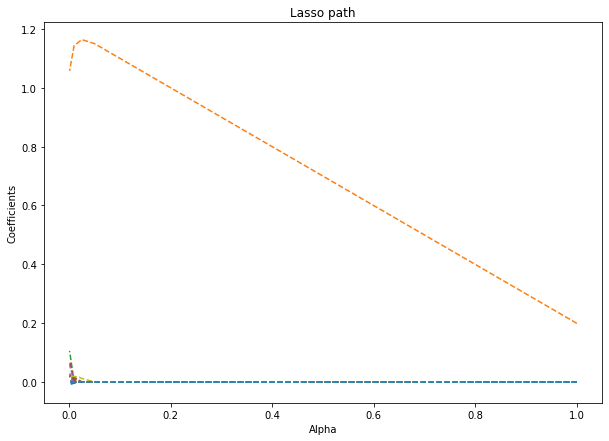

In [36]:
plt.figure(figsize=(10, 7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');

In [37]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10).fit(X_train, y_train)

In [38]:
#Alphas testés
print("alphas testés :", model_lasso.alphas_)

alphas testés : [1.90111439e-02 1.77298565e-02 1.65349235e-02 1.54205250e-02
 1.43812332e-02 1.34119862e-02 1.25080632e-02 1.16650616e-02
 1.08788755e-02 1.01456757e-02 9.46189113e-03 8.82419134e-03
 8.22947037e-03 7.67483161e-03 7.15757365e-03 6.67517714e-03
 6.22529254e-03 5.80572866e-03 5.41444198e-03 5.04952671e-03
 4.70920551e-03 4.39182082e-03 4.09582680e-03 3.81978178e-03
 3.56234127e-03 3.32225139e-03 3.09834277e-03 2.88952483e-03
 2.69478053e-03 2.51316134e-03 2.34378268e-03 2.18581957e-03
 2.03850265e-03 1.90111439e-03 1.77298565e-03 1.65349235e-03
 1.54205250e-03 1.43812332e-03 1.34119862e-03 1.25080632e-03
 1.16650616e-03 1.08788755e-03 1.01456757e-03 9.46189113e-04
 8.82419134e-04 8.22947037e-04 7.67483161e-04 7.15757365e-04
 6.67517714e-04 6.22529254e-04 5.80572866e-04 5.41444198e-04
 5.04952671e-04 4.70920551e-04 4.39182082e-04 4.09582680e-04
 3.81978178e-04 3.56234127e-04 3.32225139e-04 3.09834277e-04
 2.88952483e-04 2.69478053e-04 2.51316134e-04 2.34378268e-04
 2.18581

In [39]:
#Alpha retenu
print("alpha retenu :",model_lasso.alpha_)

alpha retenu : 6.675177140427376e-05


In [40]:
#identification par graphique de l'alpha retenu 
alphas = model_lasso.alphas_

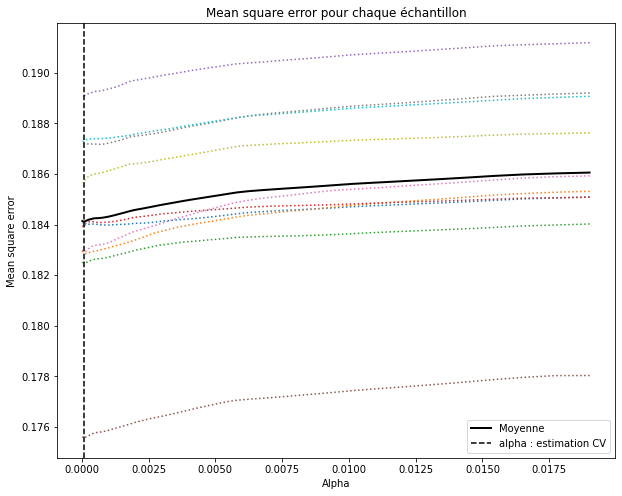

In [41]:
plt.figure(figsize=(10, 8))

plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

In [42]:
pred_test = model_lasso.predict(X_test)
print(model_lasso.score(X_test, y_test))


0.011615072549326921


In [43]:
lasso_reg=Lasso(alpha=model_lasso.alpha_)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=6.675177140427376e-05)

In [44]:
lasso_reg.coef_

array([ 3.24355909e-02,  2.65698495e-02,  3.70507554e-03,  3.51110701e-03,
        7.42626059e-03, -2.89945671e-04,  2.23797173e-03, -7.98590007e-03,
       -1.97953639e-03,  7.00582025e-03, -1.03003241e-02, -3.30037766e-03,
       -1.66418079e-03,  1.18288745e-04, -1.03187860e-03,  7.09689798e-04,
       -2.03194544e-03, -1.19428098e-03,  3.24885455e-03, -2.19269194e-03,
       -2.11036403e-02,  6.02955391e-02, -2.54481147e-15,  7.22941388e-02,
        6.02035351e-02,  3.00067146e-03, -0.00000000e+00, -6.19921454e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.16695716e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.20577129e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.64284798e-03, -0.00000000e+00, -0.00000000e+00,  3.59606231e-02,
        0.00000000e+00,  1.45594649e-02, -1.74803344e-03,  0.00000000e+00,
        1.07317269e-02,  

In [45]:
lasso_pred_train=lasso_reg.predict(X_train)
lasso_pred_test=lasso_reg.predict(X_test)
print(mean_squared_error(lasso_pred_train, y_train))
print(mean_squared_error(lasso_pred_test, y_test))

0.18376002118315687
0.18580470906800453


In [46]:
H=pd.DataFrame(lasso_reg.coef_, index=X_train.columns)

In [47]:
H=H.sort_values(by=0, ascending=False)

In [48]:
H.head(40)

,0
nblot_1,0.072294
libnatmut_Vente,0.060296
nblot_2,0.060204
adedpe202006_logtype_ch_gen_lib_princ_chaudiere fioul standard,0.035961
valeurfonc,0.032436
adedpe202006_logtype_ch_gen_lib_princ_pac air/air,0.029039
adedpe202006_logtype_traversant_traversant nord sud,0.026743
l_codinsee,0.026570
cerffo2020_annee_construction_2000-2005,0.025925
cerffo2020_usage_niveau_1_txt_Tertiaire & Autres,0.023773


In [49]:
# Autre méthode de sélection de ariables : VarianceThreshold (Transformer) = Cours 125
# Variance Threshold élimine les variables dont la variance est inférieure au seuil qu'on définit
# le but est d'éliminer les variables qui varient très peu voire pas du tout. Si la variable est une constante, elle n'est pas utile

In [50]:
# Variance de nos variables
X_train.var(axis=0)

valeurfonc                                              1.000013
l_codinsee                                              1.000013
nblocdep                                                1.000013
scarrez                                                 1.000013
anarnc202012_nb_log                                     1.000013
                                                          ...   
cerffo2020_annee_construction_>2012                     0.006867
cerffo2020_usage_niveau_1_txt_Autres                    0.000195
cerffo2020_usage_niveau_1_txt_Résidentiel collectif     0.023185
cerffo2020_usage_niveau_1_txt_Résidentiel individuel    0.002554
cerffo2020_usage_niveau_1_txt_Tertiaire & Autres        0.020552
Length: 111, dtype: float64

In [51]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)

In [52]:
selector.fit(X_train)

VarianceThreshold(threshold=0.05)

In [53]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False])

In [54]:
np.array(X_train.columns)[selector.get_support()]

array(['valeurfonc', 'l_codinsee', 'nblocdep', 'scarrez',
       'anarnc202012_nb_log', 'anarnc202012_nb_lot_garpark',
       'anarnc202012_nb_lot_tertiaire', 'anarnc202012_nb_lot_tot',
       'adedpe202006_logtype_presence_climatisation',
       'ancqpv201410_is_qpv', 'cerffo2020_nb_log',
       'igntop202103_bat_hauteur', 'mcumer202007_is_mer',
       'baie_orientation_sud', 'baie_orientation_nord',
       'baie_orientation_ouest', 'baie_orientation_est',
       'baie_orientation_autre', 'Commerces_bruyants', 'anneemut',
       'surface_appart', 'nblot_1', 'nblot_2', 'nblot_3',
       'Type appart_2P', 'Type appart_3P',
       'adedpe202006_logtype_baie_type_vitrage_double vitrage',
       'adedpe202006_logtype_baie_type_vitrage_simple vitrage',
       'adedpe202006_logtype_ch_gen_lib_princ_chaudiere gaz standard',
       'adedpe202006_logtype_ch_gen_lib_princ_generateurs a effet joule',
       'adedpe202006_logtype_ch_gen_lib_princ_reseau de chaleur',
       'adedpe202006_logtype_cl

In [55]:
H=np.array(X_train.columns)[selector.get_support()]

In [56]:
pd.DataFrame(H).head(40)

,0
0,valeurfonc
1,l_codinsee
2,nblocdep
3,scarrez
4,anarnc202012_nb_log
5,anarnc202012_nb_lot_garpark
6,anarnc202012_nb_lot_tertiaire
7,anarnc202012_nb_lot_tot
8,adedpe202006_logtype_presence_climatisation
9,ancqpv201410_is_qpv


In [57]:
# Dernière méthode de sélection de variables : SELECTKBEST - score_func=f_regression
# La méthode de sélection employée ici est la sélection univariée sur la base de information mutuelle pour la régression. 
# Cette méthode élimine les variables pour lesquelles les valeurs de l’information mutuelle avec la variable de sortie 
# sont les plus faibles (c’est à dire, qui « expliquent » le moins bien la variable de sortie). 


In [58]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector=SelectKBest (score_func=f_regression, k=50)

In [59]:
selector.fit(X_train, y_train)

SelectKBest(k=50, score_func=<function f_regression at 0x000001EEBD7D2820>)

In [60]:
#identification des variables sélectionnées
selector.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False, False])

In [61]:
H=np.array(X_train.columns)[selector.get_support()]

In [62]:
H

array(['valeurfonc', 'l_codinsee', 'nblocdep', 'scarrez',
       'anarnc202012_nb_log', 'anarnc202012_nb_lot_garpark',
       'anarnc202012_nb_lot_tertiaire', 'anarnc202012_nb_lot_tot',
       'adedpe202006_logtype_presence_climatisation',
       'ancqpv201410_is_qpv', 'cerffo2020_nb_log',
       'igntop202103_bat_hauteur', 'mcumer202007_is_mer',
       'baie_orientation_nord', 'anneemut', 'libnatmut_Vente',
       "libnatmut_Vente en l'état futur d'achèvement", 'nblot_1',
       'nblot_2', 'nblot_3', 'nblot_4', 'nblot_5', 'nblot_>10',
       'Type appart_2P', 'Type appart_3P',
       'adedpe202006_logtype_ch_gen_lib_princ_generateurs a effet joule',
       'adedpe202006_logtype_ch_gen_lib_princ_reseau de chaleur',
       'adedpe202006_logtype_classe_conso_ener_E',
       'adedpe202006_logtype_classe_conso_ener_F',
       'adedpe202006_logtype_classe_conso_ener_G',
       'adedpe202006_logtype_classe_estim_ges_B',
       'adedpe202006_logtype_classe_estim_ges_D',
       'adedpe202006_l

In [63]:
pd.DataFrame(H)[0].head(40)

0                                            valeurfonc
1                                            l_codinsee
2                                              nblocdep
3                                               scarrez
4                                   anarnc202012_nb_log
5                           anarnc202012_nb_lot_garpark
6                         anarnc202012_nb_lot_tertiaire
7                               anarnc202012_nb_lot_tot
8           adedpe202006_logtype_presence_climatisation
9                                   ancqpv201410_is_qpv
10                                    cerffo2020_nb_log
11                             igntop202103_bat_hauteur
12                                  mcumer202007_is_mer
13                                baie_orientation_nord
14                                             anneemut
15                                      libnatmut_Vente
16         libnatmut_Vente en l'état futur d'achèvement
17                                              

In [64]:
# Voir doc Excel Sélection_var pour synthèse